In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the csv file

In [3]:
data = pd.read_csv(r"D:\Rahul\Py_practice_sample\Exploratory_Data_Aanalysis(EDA)\netflix_titles.csv")

In [4]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### Getting the number of Rows and Columns

In [5]:
data.shape

(8807, 12)

#### To get the duplicate rows in the data

In [6]:
data.duplicated().sum()

0

#### Checking the sum of null values in each column

In [7]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<AxesSubplot: >

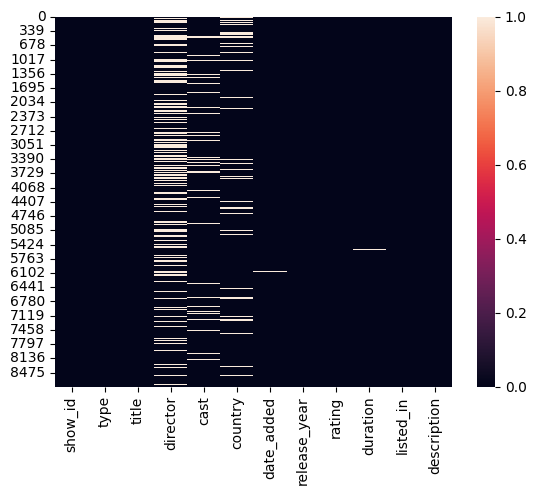

In [8]:
sns.heatmap(data.isnull())

#### Printing the row of title in 'House of Cards'

In [9]:
data[data['title'].isin(['House of Cards'])] # Using the .isin method

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1059,s1060,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [10]:
data[data['title'].str.contains('House of Cards')] # Using of .str.contains method

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1059,s1060,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


#### In which year highest number of movies and TV shows released

In [11]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [12]:
data['release_year'].value_counts()     #It counts the every individual year

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

<AxesSubplot: >

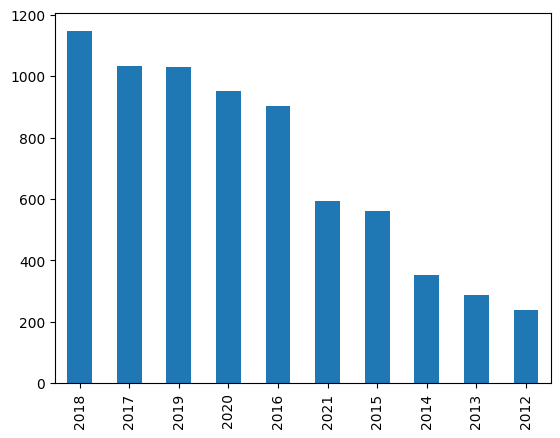

In [13]:
data['release_year'].value_counts().nlargest(10).plot(kind='bar')

#### How many movies and tv shows are in the dataset

In [14]:
data.groupby('type').type.count()

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

<AxesSubplot: xlabel='type', ylabel='count'>

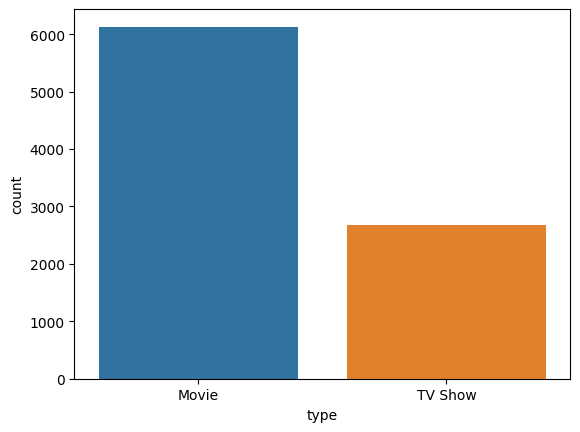

In [15]:
sns.countplot(x='type', data=data)

#### Show the movies released in 2019

In [16]:
data[(data['type'] == 'Movie') & (data['release_year'] == 2019)].head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
90,s91,Movie,Paradise Hills,Alice Waddington,"Emma Roberts, Danielle Macdonald, Awkwafina, E...","Spain, United States","September 9, 2021",2019,TV-MA,95 min,"Sci-Fi & Fantasy, Thrillers",Uma wakes up in a lush tropical facility desig...
334,s335,Movie,Five Feet Apart,Justin Baldoni,"Haley Lu Richardson, Cole Sprouse, Moisés Aria...",United States,"August 1, 2021",2019,PG-13,116 min,"Dramas, Romantic Movies",A teen with cystic fibrosis shakes up her dail...
348,s349,Movie,Poms,Zara Hayes,"Diane Keaton, Jacki Weaver, Pam Grier, Rhea Pe...","United Kingdom, United States","August 1, 2021",2019,PG-13,91 min,Comedies,"After moving to a retirement community, loner ..."


#### Showing the movies released in country

In [17]:
data[(data['country'] == 'India') & (data['type'] == 'Movie')] ['title'].head(2)

24                Jeans
105    Angamaly Diaries
Name: title, dtype: object

#### Getting the top 10 directors who gave highest number movies and tv shows

In [18]:
data['director'].value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64

#### Show where "type is movie and listed in horror" or country is united kingdom

In [19]:
data[(data['country'] == 'United States') | (data['type'] == 'Movie') & (data['listed_in'] == 'Horror Movies') ].head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...


#### In which movies "Tom cruise" was cast

In [20]:
data['cast'] = data['cast'].fillna('no cast available')

In [21]:
data[data['cast'].str.contains('Tom Cruise')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,"August 1, 2021",1999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio..."
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"March 1, 2021",1988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki..."


#### Different ratings defined by netflix

In [22]:
data['rating'].nunique()

17

In [23]:
list(data['rating'].unique())

['PG-13',
 'TV-MA',
 'PG',
 'TV-14',
 'TV-PG',
 'TV-Y',
 'TV-Y7',
 'R',
 'TV-G',
 'G',
 'NC-17',
 '74 min',
 '84 min',
 '66 min',
 'NR',
 nan,
 'TV-Y7-FV',
 'UR']

#### How many movies got the rating of TV-14 in india

In [24]:
data[(data['type'] == 'Movie') & (data['rating'] == 'TV-14')].shape

(1427, 12)

In [25]:
data[(data['rating'] == 'TV-14') & (data['country'] == 'India') & (data['type'] == 'Movie')].head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,"September 5, 2021",2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...
114,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,"September 2, 2021",1994,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...
118,s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,"September 2, 2021",2017,TV-14,106 min,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...
126,s127,Movie,Shikara,Vidhu Vinod Chopra,"Aadil Khan, Sadia Khateeb, Zain Khan Durrani, ...",India,"September 2, 2021",2020,TV-14,115 min,"Dramas, International Movies, Romantic Movies",A couple must strive to remain resilient after...


#### How many tv shows got the R rating after 2015

In [26]:
data[(data['type'] == 'TV Show') & (data['rating'] == 'R') & (data['release_year'] > 2015)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7593,s7594,TV Show,Nobel,NaN,"Aksel Hennie, Tuva Novotny, Anders Danielsen L...",Norway,"December 10, 2016",2016,R,1 Season,"International TV Shows, TV Dramas, TV Thrillers",A series of incidents in Afghanistan set compl...


#### What is the maximum duration of movie or tv show

In [27]:
data['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [28]:
data[['int_minutes', 'str_minutes']] = data['duration'].str.split(pat=' ', expand=True)

In [29]:
data['int_minutes'].fillna(0, inplace=True)

In [30]:
data['int_minutes'].astype('int64').max()

312